### Importing Libraries


In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset & Extracting Features

In [6]:

dis = pd.read_csv('../../../data/dateset1/Training.csv')
X = dis.iloc[:, :-1].values
y = dis.iloc[:, -1].values

### Data Splitting & Preprocessing 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model Training & Predicting

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evalaution

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print()
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

0.9349593495934959



### HyperParameter Tuning


In [10]:
# from sklearn.model_selection import GridSearchCV

In [11]:
# # clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=5)
# param_grid = {'n_estimators':list(range(1,100)),
#                'max_depth' : list(range(1,10)),
#                'max_leaf_nodes' : list(range(2,20))
#                }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
# grid_search.fit(X_train, y_train)
# grid_search.predict(X_test)

### Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
cVal = 10

In [13]:

score = cross_val_score(clf, X_train, y_train,cv=cVal,)
print(score) 
print(score.mean()) 


[0.94202899 0.92173913 0.89855072 0.94202899 0.92151163 0.96511628
 0.90406977 0.9244186  0.98546512 0.9244186 ]
0.9329347826086956


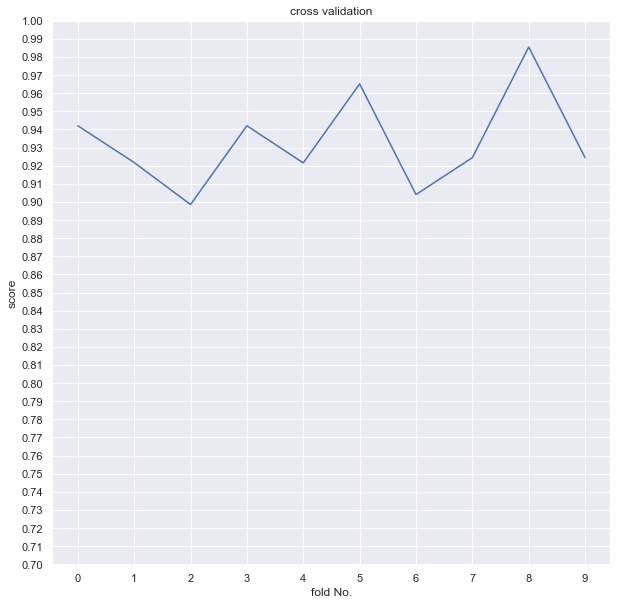

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(range(0,cVal), score)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0.7, 1, 0.01))

plt.show()

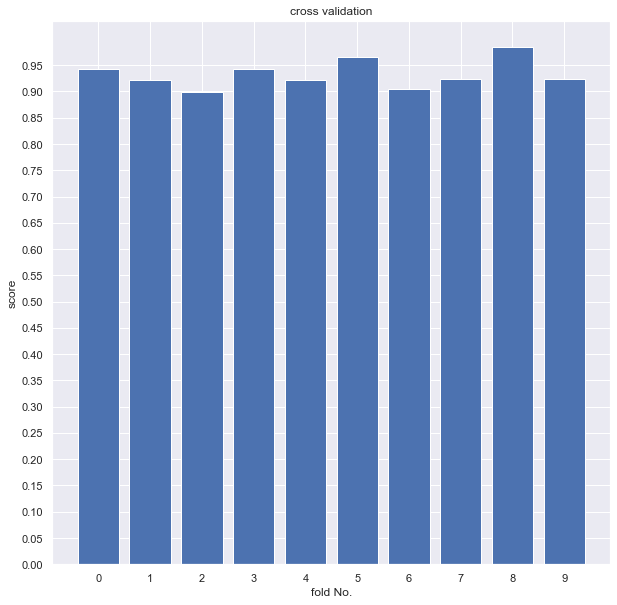

In [15]:
plt.figure(figsize=(10, 10))
plt.bar(range(0,cVal), score)
# plt.plot(range(0,20), scores)

plt.xlabel('fold No.')
plt.ylabel('score')
plt.title('cross validation')

plt.xticks(range(0,cVal))
plt.yticks( np.arange(0, 1, 0.05))

plt.show()

#### Kfold cross validation Cross Validation (KFCV)

In [16]:
cVal2 = 10

In [17]:
from sklearn.model_selection import KFold
kfcv = KFold(n_splits=cVal2 ,shuffle=True, random_state=42)
score2 = cross_val_score(clf, X_train, y_train,cv=kfcv)

print(score2) 
print(score2.mean()) 

[0.88115942 0.88115942 0.8        0.80289855 0.88953488 0.91569767
 0.97383721 0.875      0.86918605 0.89825581]
0.8786729019211323
